In [67]:
! pip install seaborn

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.io.arff import loadarff 
import visualization


In [6]:
raw_data = loadarff('../Scenario A1-ARFF/TimeBasedFeatures-Dataset-15s-VPN.arff')
df = pd.DataFrame(raw_data[0])

In [10]:
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,4802.688438,4.0,1523088.0,97590.739583,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,4340.186245,4.0,1517774.0,87383.785714,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,4161.512416,15.0,1079974.0,89312.019231,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,3918.666087,8.0,2441990.0,127659.871795,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,2802.540152,10.0,3042717.0,133013.359551,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'


In [11]:
df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,4.518895e+05,4.165270e+04,3.856132e+06,4.768167e+05,1.035025e+06,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,8.856083e+06,4.433155e+05,1.387048e+07,1.404428e+06,3.534085e+06,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.247000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,3.862042e+02,3.000000e+00,2.588575e+04,9.577449e+03,5.574602e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,2.657059e+03,1.700000e+01,3.508775e+05,8.412602e+04,7.518175e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,1.351181e+04,1.710000e+02,4.696002e+06,3.119330e+05,7.659213e+05,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,6.170000e+08,1.891990e+07,6.001097e+08,6.070000e+07,1.360000e+08,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


In [ ]:
with pd.option_context('display.max_columns', df.shape[1]):
    print(df.describe(include='all'))

In [25]:
df.shape

(18758, 24)

In [14]:
print ("Values of label: ",  df['class1'].unique() )

Values of label:  [b'Non-VPN' b'VPN']


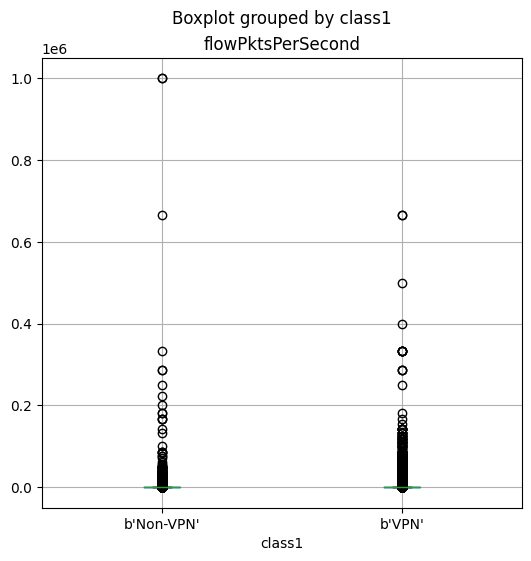

In [31]:
df.boxplot(column=['flowPktsPerSecond',], by='class1', figsize=(6, 6))
plt.show()

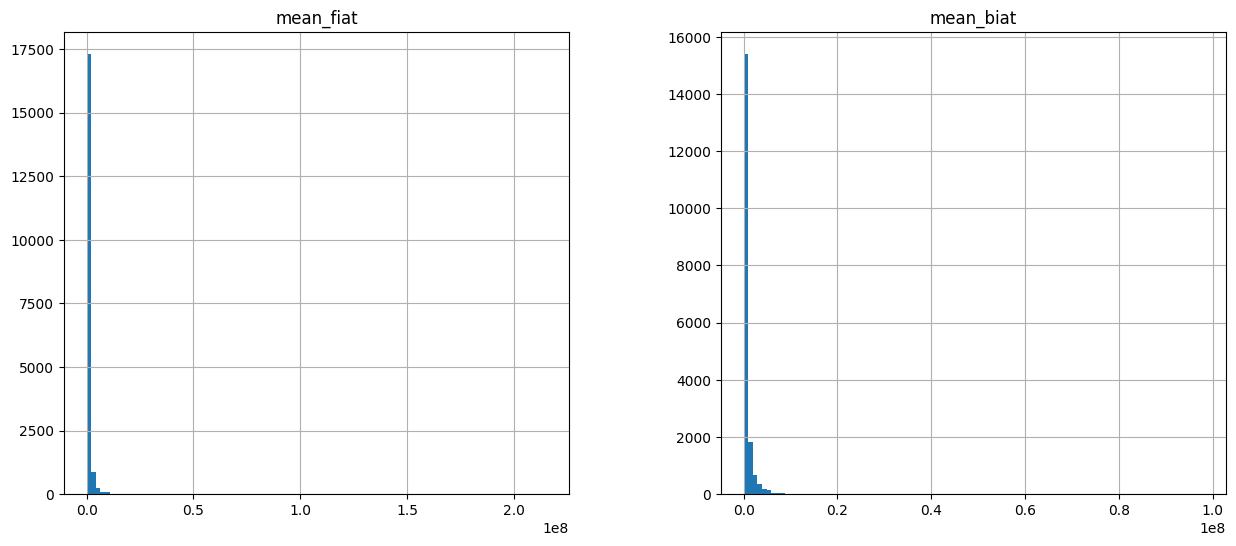

In [60]:
df[['mean_fiat','mean_biat']].hist(bins=100, figsize=(15,6))
plt.show()

<Figure size 2000x1500 with 0 Axes>

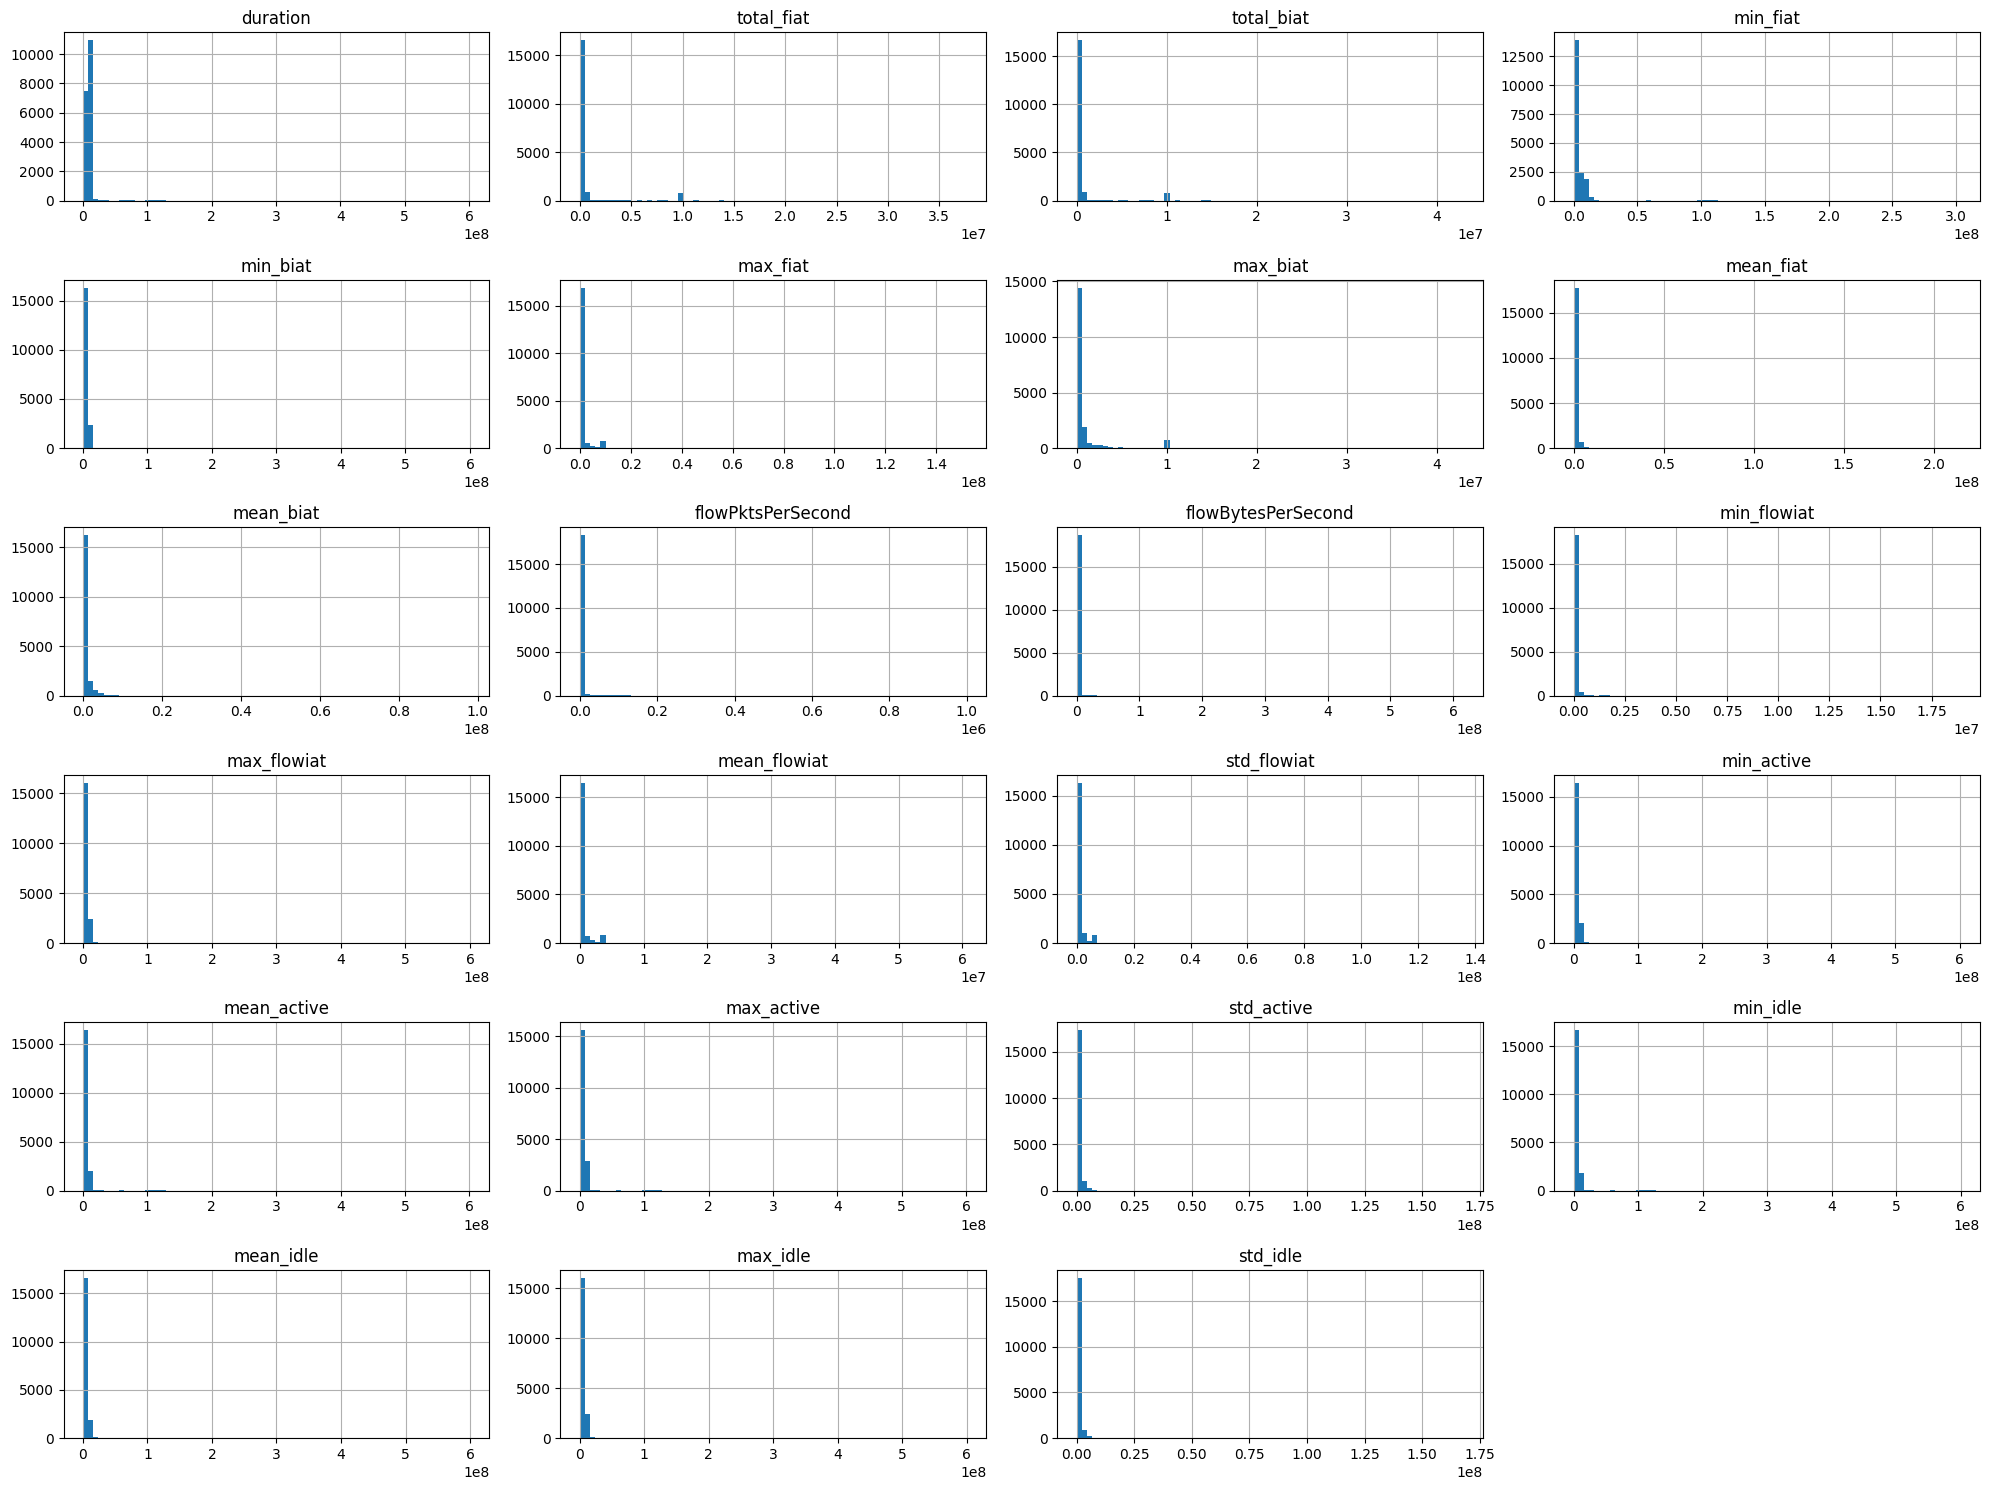

In [62]:
plt.figure(figsize=(20, 15))  # Ajuster la taille de la figure pour afficher plusieurs histogrammes
df.hist(bins=75, figsize=(20, 15), layout=(6, 4)) 
plt.tight_layout() 
plt.show()

In [98]:
print(df.columns)

Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1', 'label_num'],
      dtype='object')


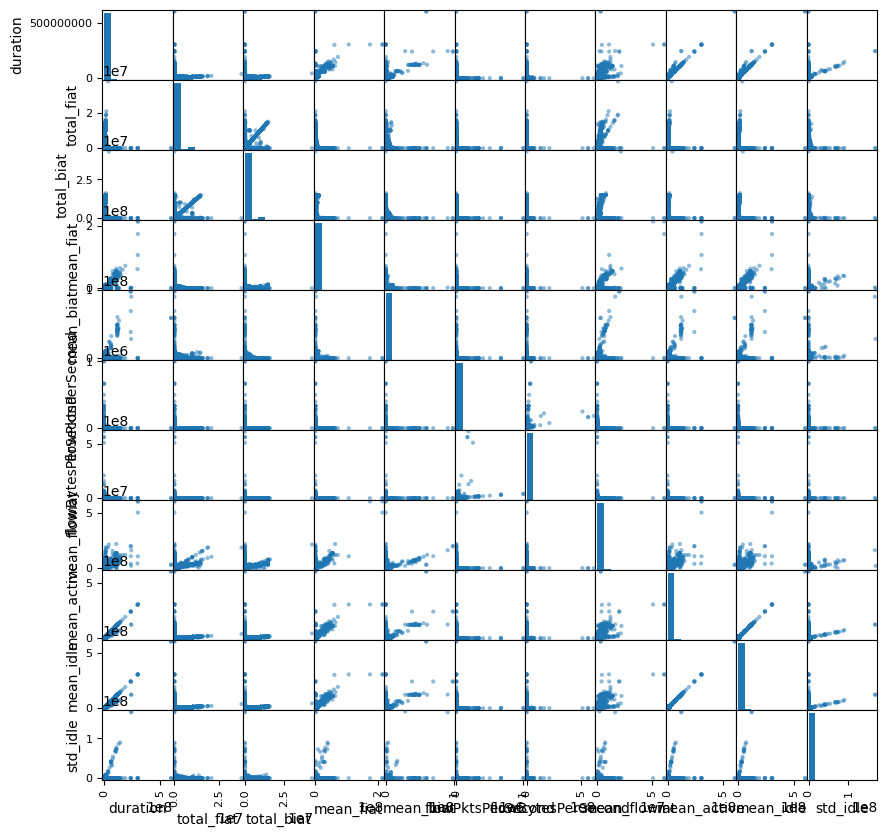

In [99]:
columns_to_plot = ['duration', 'total_fiat', 'total_biat',
                    'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowiat',
        'mean_active', 'mean_idle', 'std_idle', 'class1']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

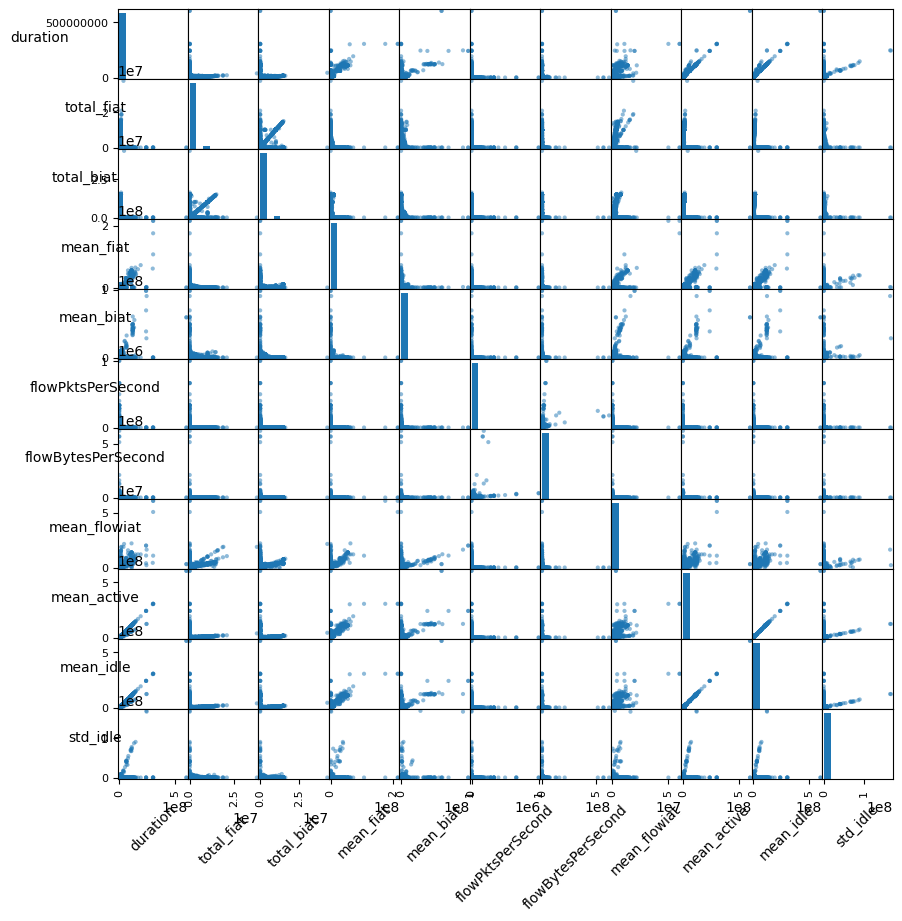

In [100]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

In [101]:
# Let us write our replacing function
def replace_function(label_text):
    if label_text==b'Non-VPN':
        return 1
    elif label_text==b'VPN':
        return 2
    else:
        return 0

# Let us apply it, line by line
label_numeric = df['class1'].apply(replace_function)

# Let us add this column to our dataframe
df['label_num'] = label_numeric

In [102]:
columns_to_plot.append('label_num')

In [103]:
print ("Values of label: ",  df['label_num'].unique())

Values of label:  [1 2]


In [104]:
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1,label_num
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,4802.688438,4.0,1523088.0,97590.739583,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN',1
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,4340.186245,4.0,1517774.0,87383.785714,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN',1
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,4161.512416,15.0,1079974.0,89312.019231,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN',1
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,3918.666087,8.0,2441990.0,127659.871795,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN',1
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,2802.540152,10.0,3042717.0,133013.359551,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN',1


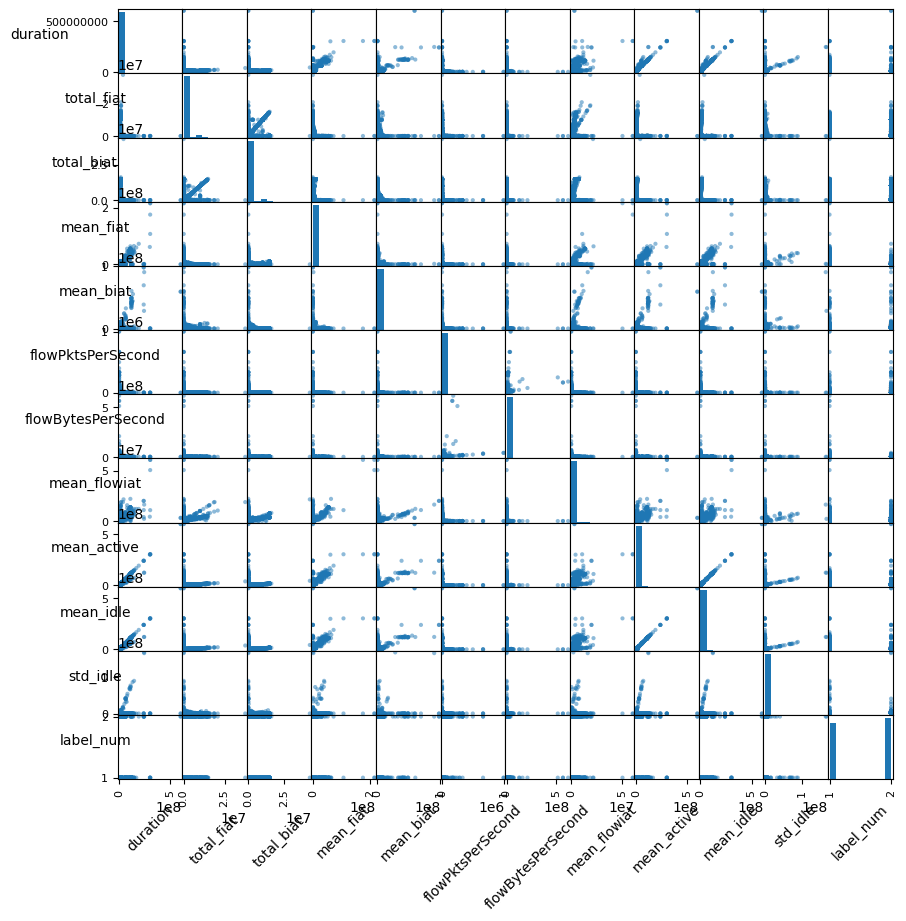

In [105]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type